описание

In [1]:
import json
import pandas as pd
from sklearn.cluster import DBSCAN
import ctypes
from welly import Well, Project, Curve
import matplotlib.pyplot as plt
import os

with open('famdict.json', 'r', encoding='utf-8') as f:
    famdict = json.load(f)
with open('lqcdict.json', 'r', encoding='utf-8') as f:
    lqcdict = json.load(f)

In [2]:
def datasetlist_sort(dbdatasetlist):
    dsets = []
    distance_typing = 300  #параметр для настройки типизации интервалов записи
    for dset in dbdatasetlist:
        top = dset[1]
        bottom = dset[2]
        if top > bottom:
            top, bottom = bottom, top
        dsets.append([dset[0], top, bottom, bottom - top])
    ds_df = pd.DataFrame(dsets, columns=['project_index', 'top', 'bottom', 'size'])
    ds_df.sort_values(by=['top', 'size'], inplace=True)

    dbs = DBSCAN(eps=distance_typing, min_samples=1).fit(ds_df[['top', 'bottom']])
    ds_df['labels'] = dbs.labels_

    print(ds_df.to_string())

    return ds_df[['project_index', 'labels']].values.tolist()

#идея в том чтобы возвращать массив данных кривойб юниты.чтобы сразу записать в обьект welly
#нужно найти кривую проверить юниты и если не совпадают то пересчитать в нужные записать все в массив и вернуть его
def lqclogdata(dataset_ind, dslabel_):
    logs = []
    lqcname = ''
    for cname in las_project[dataset_ind].data.keys():
        if any(cname in sublist for sublist in list(lqcdict.values())):  # есть ли кривая в словаре lqcdict гделибо
            lqcname = list(lqcdict.keys())[list(lqcdict.values()).index(
                [sublist for sublist in list(lqcdict.values()) if cname in sublist][
                    0])] + dslabel_  #выбираем из словаря ключ соотвествующий найденному в значениях имени кривой
            if lqcname in wLQC.data.keys():
                clist = [i for i in wLQC.data.keys() if i.find(lqcname) != -1]
                if len(clist) >= 1:
                    lqcname = lqcname + "_" + str(len(clist))

            logs.append([cname, lqcname])

        #if db.variableUnit(well, ds, lqcname)!=famdict[lqcname[0:version_index]][1]:
        # 	crunit = ""
        #
        # 	if lqcname[0:version_index] == "NPHI": #добавить проверку по конкретным методам ГК НК
        # 		if  float(db.variableInformation(well, ds, lqcname," Mean"))<1:
        # 			crunit = "v/v"
        # 		else:
        # 			crunit = "%"
        #
        # 	elif lqcname[0:version_index] == "GR" :
        # 		if float(db.variableInformation(well, ds, lqcname, "Mean"))<50:
        # 			crunit = "uR/H"
        # 		else:
        # 			crunit = "Gapi"
        #
        # 	elif lqcname[0:version_index] == "CALI" :
        # 		if float(db.variableInformation(well, ds, lqcname, "Mean"))<1:
        # 			crunit = "m"
        # 		else:
        # 			crunit = "mm"
        # 	else:
        # 		crunit = famdict[lqcname[0:version_index]][1]
    return logs

In [3]:
#указать папку с ласами они могут быть из разных скважин

las_path = "/Users/victorpotysyev/PycharmProjects/lqc_maker/511"
LWD_merge = False #добавить функцию слияния кривых из разных итервалов записи для lwd


#find list of las files in folder las_path including subfolders
las_list = []
for root, dirs, files in os.walk(las_path):
    for file in files:
        if file.lower().endswith(".las"):
            las_list.append(os.path.join(root, file))


las_project = Project.from_las(las_list, index='M')
#сделать таблицу выполненного комплекса по скважине. или скважинам? нудно выделить то, что есть в ласах и то что было занесено в lqc
wells_list = {}
for ind, w in enumerate(las_project):

    well_name = str(w.name).replace(" ", "")
    ds_start = w.header[w.header['mnemonic'] == 'STRT']['value'].values[0]
    ds_stop = w.header[w.header['mnemonic'] == 'STOP']['value'].values[0]

    if well_name == 'WELL' or well_name == '':
        well_name = str(w.fname)
        print("!!! file {} does not contain well name. Using file name instead".format(w.fname)) #задавать вручную

    if well_name not in wells_list.keys() :
        wells_list[well_name] = []

    wells_list[well_name].append([ind, ds_start, ds_stop])
print(wells_list)


0it [00:00, ?it/s]/opt/anaconda3/lib/python3.9/site-packages/welly/las.py:144: UserWarning: Warning, LAS version 3.0 not yet supported. Attempting to use LAS 1.2 and 2.0 parsing logic for LAS 3.0.
  datasets = from_lasio(las)
/opt/anaconda3/lib/python3.9/site-packages/welly/las.py:144: UserWarning: Warning, LAS version 3.0 not yet supported. Attempting to use LAS 1.2 and 2.0 parsing logic for LAS 3.0.
  datasets = from_lasio(las)
2it [00:00, 12.75it/s]/opt/anaconda3/lib/python3.9/site-packages/welly/las.py:144: UserWarning: Warning, LAS version 3.0 not yet supported. Attempting to use LAS 1.2 and 2.0 parsing logic for LAS 3.0.
  datasets = from_lasio(las)
/opt/anaconda3/lib/python3.9/site-packages/welly/las.py:144: UserWarning: Warning, LAS version 3.0 not yet supported. Attempting to use LAS 1.2 and 2.0 parsing logic for LAS 3.0.
  datasets = from_lasio(las)
4it [00:00,  7.19it/s]/opt/anaconda3/lib/python3.9/site-packages/welly/las.py:144: UserWarning: Warning, LAS version 3.0 not yet

{'511R': [[0, 3188.1, 3519.1], [1, 3203.3, 3520.3], [2, 1157.04, 3191.34], [3, 112.9, 1250.3], [4, 1142.74, 3180.54], [5, 3160.6, 3520.3], [6, 1004.82, 3201.42], [7, 3285.6, 3517.4], [8, 567.26, 1252.66], [9, 1153.57, 3191.27], [10, 3159.91, 3528.51], [11, 1156.6, 3190.9], [12, 3186.1, 3524.5], [13, 565.5, 1282.05], [14, 1183.4, 3198], [15, 3159.91, 3528.51], [16, 523.1, 1257.4], [17, 516.2, 1240.3]]}


In [4]:

for well in wells_list:
    print(well)
    #determine maximum depth for lqc dataset and create list for dataframe index

    max_depth = max([w[2] for w in wells_list[well]])
    min_depth = min([w[1] for w in wells_list[well]])
    #MD = [round(d * 0.1, 1) for d in range(0, int(round((max_depth + 5) / 0.1, 0)) + 1)]

    wLQC = Well()
    wLQC.name = well



    for dataset_ind, dslabel in datasetlist_sort(wells_list[well]):
        if dslabel == 0:
            dslabel_ = ""
        else:
            dslabel_ = "_" + str(dslabel)


        #copy curve object correctly to preserve unit information
        #assign or check units for curves
        for cname, lqcname in lqclogdata(dataset_ind, dslabel_):

            wLQC.data[lqcname] = Curve(data=las_project[dataset_ind].data[cname].values, index=las_project[dataset_ind].data[cname].index,
                      mnemonic=lqcname ).to_basis(start=min_depth-5, stop=max_depth + 5, step=0.1)

    if len(wLQC.data.keys()) > 0:
        wLQC.to_las(well +"_LQC.las")

511R
    project_index      top   bottom     size  labels
3               3   112.90  1250.30  1137.40       0
17             17   516.20  1240.30   724.10       1
16             16   523.10  1257.40   734.30       1
13             13   565.50  1282.05   716.55       1
8               8   567.26  1252.66   685.40       1
6               6  1004.82  3201.42  2196.60       2
4               4  1142.74  3180.54  2037.80       2
9               9  1153.57  3191.27  2037.70       2
11             11  1156.60  3190.90  2034.30       2
2               2  1157.04  3191.34  2034.30       2
14             14  1183.40  3198.00  2014.60       2
10             10  3159.91  3528.51   368.60       3
15             15  3159.91  3528.51   368.60       3
5               5  3160.60  3520.30   359.70       3
12             12  3186.10  3524.50   338.40       3
0               0  3188.10  3519.10   331.00       3
1               1  3203.30  3520.30   317.00       3
7               7  3285.60  3517.40   231

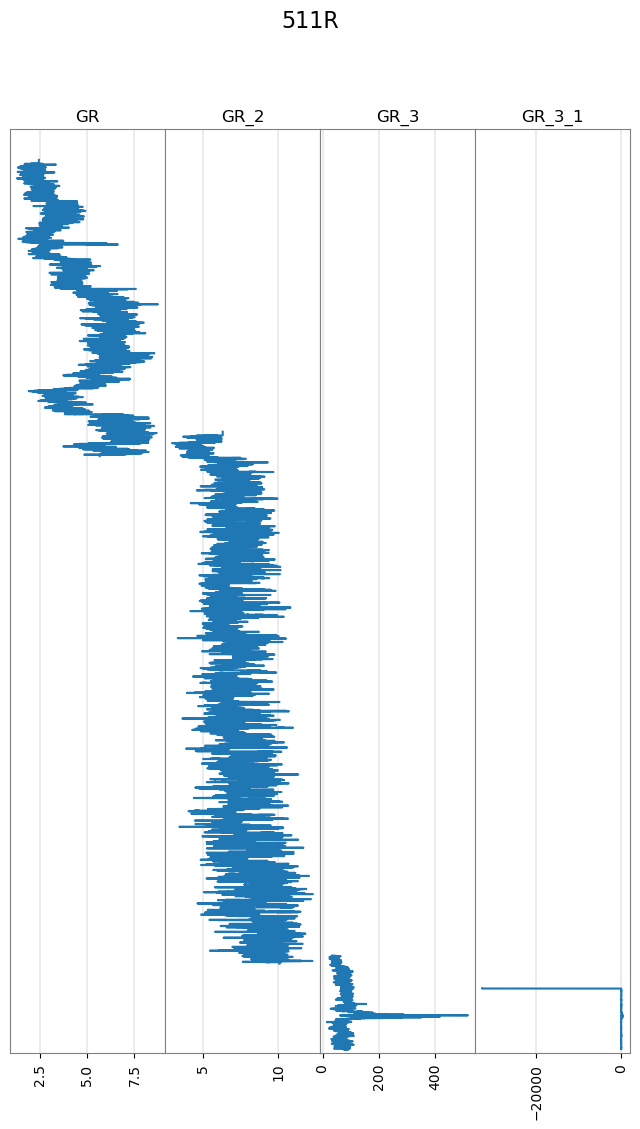

In [27]:
tracks = []
for c in wLQC:
    if c.mnemonic.startswith('GR'):
        tracks.append(c.mnemonic)
wLQC.plot(tracks=tracks)
